In [179]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
import pingouin as pg
import statsmodels.formula.api as s
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [180]:
final = pickle.load(open( '../00_data/final/competence_pruefungssatze.pkl','rb') )

In [181]:
final

,UserID,ability,interventiongroup,Geschlecht,Klassenstufe
0,186923,1.40629,6,m,9
1,360974,2.67299,2,w,10
2,373836,2.84213,2,w,6
3,409463,1.04195,control,m,9
4,435839,1.57918,control,w,8
...,...,...,...,...,...
8086,1063461,3.44801,6,m,11
8087,1063470,1.62061,2,w,11
8088,1063762,2.67638,NaN,NaN,NaN
8089,1063918,2.43036,6,w,13


In [182]:
intvcontrol = final[(final['interventiongroup']=='control')]
intv2 = final[(final['interventiongroup']=='2')]
intv3 = final[(final['interventiongroup']=='3')]
intv4 = final[(final['interventiongroup']=='4')]
intv5 = final[(final['interventiongroup']=='5')]
intv6 = final[(final['interventiongroup']=='6')]

Check assumptions

In [183]:
# Levenes homogeneity => homogeneity = not significant // significant = no homogeneity 
stats.levene(intvcontrol['ability'], intv2['ability'], intv3['ability'], intv4['ability'], intv5['ability'], intv6['ability'])

LeveneResult(statistic=5.523852523953992, pvalue=4.402445831831212e-05)

In [184]:
# Shapiro-Wilk test for normality => normality = not significant // significant = no normality 
print(stats.shapiro(intvcontrol['ability']))
print(stats.shapiro(intv2['ability']))
print(stats.shapiro(intv3['ability']))
print(stats.shapiro(intv4['ability']))
print(stats.shapiro(intv5['ability']))
print(stats.shapiro(intv6['ability']))

ShapiroResult(statistic=0.9959957599639893, pvalue=0.00013851356925442815)
ShapiroResult(statistic=0.9934440851211548, pvalue=2.4465656679240055e-05)
ShapiroResult(statistic=0.9972237348556519, pvalue=0.024256736040115356)
ShapiroResult(statistic=0.9963895082473755, pvalue=0.004222299437969923)
ShapiroResult(statistic=0.9947472810745239, pvalue=0.0003782680141739547)
ShapiroResult(statistic=0.9917706847190857, pvalue=1.3101991953590186e-06)


<AxesSubplot:xlabel='ability', ylabel='Count'>

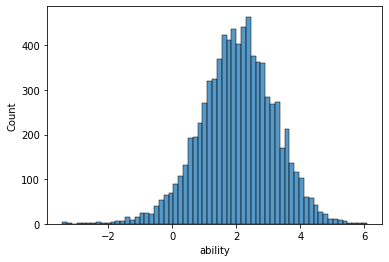

In [185]:
sns.histplot(data=final, x="ability")

In [186]:
# # Fit and summarize ols model
# model = ols('ability ~ C(interventiongroup)+C(Geschlecht)+C(interventiongroup):C(Geschlecht)',data=final).fit()
# # type-1 anova summary 
# table_type_1 = sm.stats.anova_lm(model, typ=1)

# # type-2 anova summary
# table_type_2 = sm.stats.anova_lm(model, typ=2)
# table_type_1

In [187]:
# aov = pg.anova(data=final, dv='ability', between=['interventiongroup'], detailed=True)
# print(aov)


Übersicht Effektgroeßen

In [188]:
ability_by_group = final.groupby(['interventiongroup']).agg({'ability':'mean','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})
ability_by_group

,ability,count
interventiongroup,,
2,2.165744,1253
3,2.144494,1285
4,2.122565,1287
5,1.887490,1183
6,1.829661,1289
control,2.061138,1750


In [189]:
ability_by_group = final.groupby(['Geschlecht','interventiongroup']).agg({'ability':'median','Klassenstufe':'count'})
ability_by_group = ability_by_group.rename(columns={'Klassenstufe':'count'})

ability_by_group

ability  count
Geschlecht interventiongroup                 
d          2                  2.308550     35
           3                  2.223630     37
           4                  2.092760     33
           5                  1.661390     37
           6                  1.874050     43
           control            2.063860     53
m          2                  2.114540    568
           3                  2.111620    571
           4                  2.053160    636
           5                  1.891500    551
           6                  1.785270    625
           control            1.989540    810
w          2                  2.220105    650
           3                  2.233150    677
           4                  2.153500    618
           5                  2.025890    595
           6                  1.967560    621
           control            2.167120    887

In [190]:
ability_by_group = final.groupby(['Klassenstufe','interventiongroup']).agg({'ability':'median','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})

ability_by_group

ability  count
Klassenstufe interventiongroup                 
10           2                  2.359700    131
             3                  2.298070    125
             4                  2.360570    130
             5                  2.105040    120
             6                  2.357690    125
             control            2.355050    173
11           2                  2.398610    107
             3                  2.204730    107
             4                  2.297315    110
             5                  2.246015     98
             6                  2.200780    119
             control            2.171600    157
12           2                  2.599510     39
             3                  2.631610     37
             4                  2.733860     27
             5                  2.250040     41
             6                  2.560990     33
             control            2.408800     46
13           2                  2.465830     25
             3                  2.529970     21
             4                  2.352150     23
             5                  2.486820     19
             6                  2.628550     29
             control            2.487335     38
5            2                  1.980590    114
             3                  1.867700    109
             4                  1.836555    126
             5                  1.729740     99
             6                  1.631660    124
             control            1.912140    155
6            2                  1.911520    196
             3                  2.093930    183
             4                  1.898650    185
             5                  1.823020    173
             6                  1.524510    185
             control            1.846735    224
7            2                  2.058040    174
             3                  2.163095    190
             4                  2.141110    220
             5                  1.631260    214
             6                  1.722300    220
             control            2.046385    310
8            2                  2.297590    237
             3                  2.118325    276
             4                  2.061310    251
             5                  1.825675    202
             6                  1.756975    246
             control            2.104110    336
9            2                  2.244305    230
             3                  2.064030    237
             4                  2.137850    215
             5                  2.019160    217
             6                  1.978075    208
             control            2.071000    311

Alle Daten

In [205]:
# Kruskal Wallis Test 
stats.kruskal(intvcontrol['ability'], intv2['ability'], intv3['ability'],intv4['ability'],intv5['ability'],intv6['ability'])


KruskalResult(statistic=81.45671861632043, pvalue=4.1591239334251873e-16)

In [206]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol['ability'], intv2['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv3['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv4['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv5['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv6['ability']))


MannwhitneyuResult(statistic=1033294.5, pvalue=0.007094216545216739)
MannwhitneyuResult(statistic=1076742.5, pvalue=0.045830223923261866)
MannwhitneyuResult(statistic=1093732.5, pvalue=0.1749337639365881)
MannwhitneyuResult(statistic=1120622.0, pvalue=0.0001446250026686082)
MannwhitneyuResult(statistic=1241557.5, pvalue=1.97914331201671e-06)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

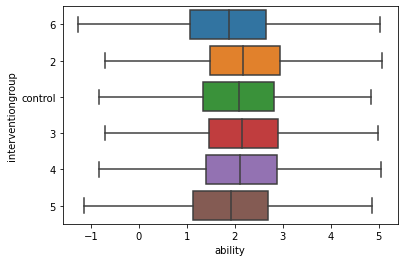

In [193]:
sns.boxplot(data=final, x="ability", y="interventiongroup",showfliers = False)#,hue='Geschlecht'


<AxesSubplot:xlabel='ability', ylabel='Geschlecht'>

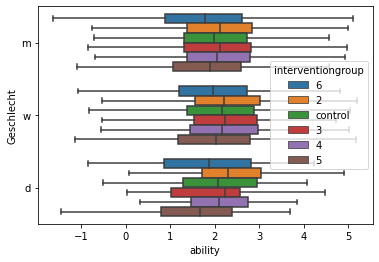

In [194]:
sns.boxplot(data=final, x="ability", hue="interventiongroup",y='Geschlecht',showfliers = False)


Gender Demographics

In [195]:
final_m = final.loc[final.Geschlecht == 'm']
final_w = final.loc[final.Geschlecht == 'w']
final_d = final.loc[final.Geschlecht == 'd']

Jungen

In [196]:
intvcontrol_m = final_m[(final_m['interventiongroup']=='control')]
intv2_m = final_m[(final_m['interventiongroup']=='2')]
intv3_m = final_m[(final_m['interventiongroup']=='3')]
intv4_m = final_m[(final_m['interventiongroup']=='4')]
intv5_m = final_m[(final_m['interventiongroup']=='5')]
intv6_m = final_m[(final_m['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_m['ability'], intv2_m['ability'], intv3_m['ability'],intv4_m['ability'],intv5_m['ability'],intv6_m['ability'])



KruskalResult(statistic=41.13718870150659, pvalue=8.802670692429036e-08)

In [197]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv2_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv3_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv4_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv5_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv6_m['ability']))


MannwhitneyuResult(statistic=220455.5, pvalue=0.18748006137074713)
MannwhitneyuResult(statistic=221333.5, pvalue=0.17403550338466456)
MannwhitneyuResult(statistic=248599.5, pvalue=0.25455229992649275)
MannwhitneyuResult(statistic=241894.0, pvalue=0.008468310526602105)
MannwhitneyuResult(statistic=282481.5, pvalue=0.00016219203575287182)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

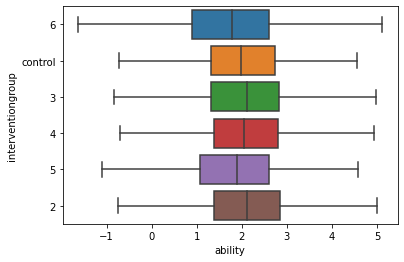

In [198]:
sns.boxplot(data=final_m, x="ability", y="interventiongroup",showfliers = False)


Maedchen

In [199]:
intvcontrol_w = final_w[(final_w['interventiongroup']=='control')]
intv2_w = final_w[(final_w['interventiongroup']=='2')]
intv3_w = final_w[(final_w['interventiongroup']=='3')]
intv4_w = final_w[(final_w['interventiongroup']=='4')]
intv5_w = final_w[(final_w['interventiongroup']=='5')]
intv6_w = final_w[(final_w['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_w['ability'], intv2_w['ability'], intv3_w['ability'],intv4_w['ability'],intv5_w['ability'],intv6_w['ability'])


KruskalResult(statistic=34.94575462537525, pvalue=1.5426254900914696e-06)

In [200]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv2_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv3_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv4_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv5_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv6_w['ability']))


MannwhitneyuResult(statistic=269648.5, pvalue=0.030252104306592628)
MannwhitneyuResult(statistic=287160.5, pvalue=0.13914120925462967)
MannwhitneyuResult(statistic=266542.5, pvalue=0.3633174631603394)
MannwhitneyuResult(statistic=282330.5, pvalue=0.022358804822287855)
MannwhitneyuResult(statistic=299197.5, pvalue=0.004267454859874528)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

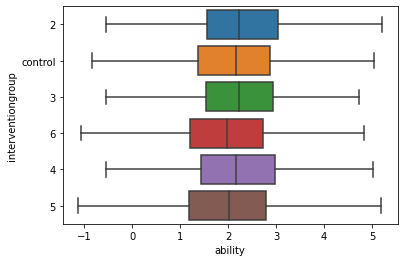

In [201]:
sns.boxplot(data=final_w, x="ability", y="interventiongroup",showfliers = False)

Divers

In [202]:
intvcontrol_d = final_d[(final_d['interventiongroup']=='control')]
intv2_d = final_d[(final_d['interventiongroup']=='2')]
intv3_d = final_d[(final_d['interventiongroup']=='3')]
intv4_d = final_d[(final_d['interventiongroup']=='4')]
intv5_d = final_d[(final_d['interventiongroup']=='5')]
intv6_d = final_d[(final_d['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_d['ability'], intv2_d['ability'], intv3_d['ability'],intv4_d['ability'],intv5_d['ability'],intv6_d['ability'])


KruskalResult(statistic=9.054763634054325, pvalue=0.10689965698938773)

In [203]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv2_d['ability']))
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv3_d['ability']))
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv4_d['ability']))
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv5_d['ability']))
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv6_d['ability']))


MannwhitneyuResult(statistic=805.0, pvalue=0.2982841015814647)
MannwhitneyuResult(statistic=1008.0, pvalue=0.8247741346725685)
MannwhitneyuResult(statistic=841.0, pvalue=0.76947964992593)
MannwhitneyuResult(statistic=1224.0, pvalue=0.04629657836355986)
MannwhitneyuResult(statistic=1221.0, pvalue=0.5506511968463674)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

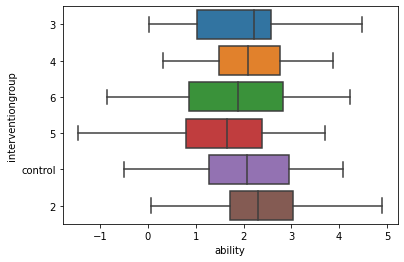

In [204]:
sns.boxplot(data=final_d, x="ability", y="interventiongroup",showfliers = False)

Demographics Klassenstufe